In [1]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
sys.path.append("../src")  # add src folder to path

from policy import StochasticPolicyNetwork
from train import train_policy

# Initialize policy
policy = StochasticPolicyNetwork(state_dim=2, action_dim=2)
# smoothed = pd.Series(rewards).rolling(window=10, min_periods=1).mean()
# plt.plot(smoothed, label='Smoothed Reward')


Episode 0: Total Reward -23.30, Final Dist 0.57, Violations: 0
Episode 10: Total Reward -498.25, Final Dist 3.20, Violations: 0
Episode 20: Total Reward -89.61, Final Dist 1.49, Violations: 0
Episode 30: Total Reward -73.33, Final Dist 1.28, Violations: 0
Episode 40: Total Reward -202.04, Final Dist 2.08, Violations: 0
Episode 50: Total Reward -74.09, Final Dist 0.80, Violations: 12
Episode 60: Total Reward -116.02, Final Dist 2.03, Violations: 0
Episode 70: Total Reward -17.31, Final Dist 0.77, Violations: 0
Episode 80: Total Reward -110.53, Final Dist 1.48, Violations: 0
Episode 90: Total Reward -10.11, Final Dist 0.03, Violations: 0
Episode 100: Total Reward -7.14, Final Dist 0.59, Violations: 0
Episode 110: Total Reward -200.17, Final Dist 1.57, Violations: 0
Episode 120: Total Reward -121.46, Final Dist 1.80, Violations: 0
Episode 130: Total Reward -131.93, Final Dist 2.01, Violations: 0
Episode 140: Total Reward -81.53, Final Dist 1.67, Violations: 0
Episode 150: Total Reward -15

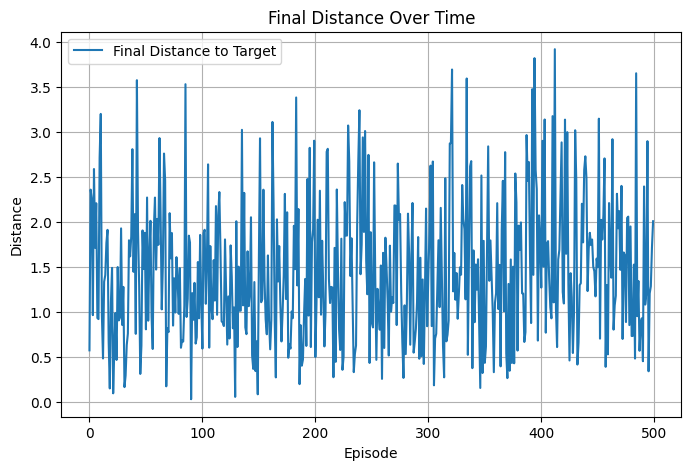

In [2]:
returns, dists, best_traj = train_policy(policy, num_episodes=500)

plt.figure(figsize=(8,5))
plt.plot(dists, label='Final Distance to Target')
plt.xlabel('Episode')
plt.ylabel('Distance')
plt.title('Final Distance Over Time')
plt.legend()
plt.grid(True)
plt.show()


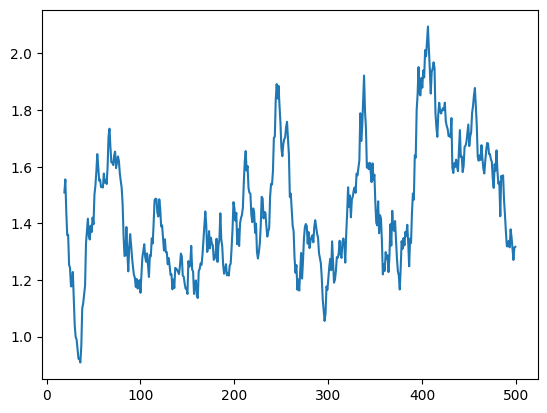

In [3]:

import numpy as np
plt.plot(pd.Series(dists).rolling(20).mean(), label='Smoothed Final Distance')


In [4]:
plt.savefig("final_distance_over_time.png", dpi=300)
print(f"Min final distance: {np.min(dists):.2f}")


Min final distance: 0.03


<Figure size 640x480 with 0 Axes>

In [5]:
best_idx = np.argmin(dists)
print(f"Best episode index: {best_idx}")


Best episode index: 90


In [6]:
import matplotlib.pyplot as plt

def plot_trajectory(traj, start, target, title="Best Episode Trajectory", save_path=None):
    """
    Plots the trajectory of an agent given a sequence of states.
    
    Parameters:
        traj (ndarray): Array of shape (T, 2) with agent positions over time
        start (ndarray): Initial position (2D)
        target (ndarray): Target position (2D)
        title (str): Plot title
        save_path (str): Optional path to save the figure
    """
    plt.figure(figsize=(6, 6))
    plt.plot(traj[:, 0], traj[:, 1], marker='o', markersize=2, label='Trajectory')
    plt.scatter(start[0], start[1], color='green', s=100, label='Start')
    plt.scatter(target[0], target[1], color='red', s=100, label='Target')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()
    if save_path:
        plt.savefig(save_path, dpi=300)
    plt.show()


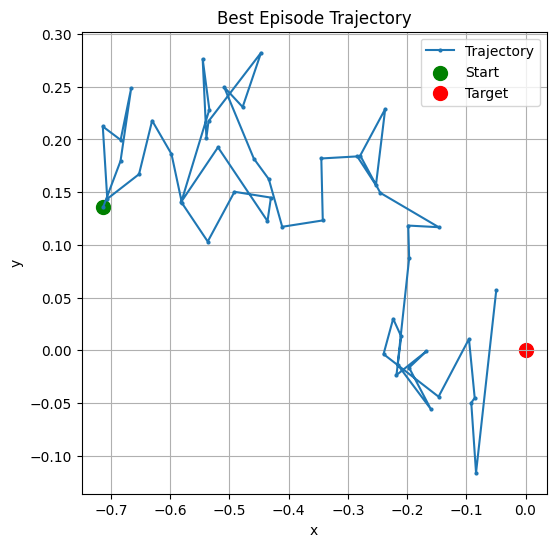

In [7]:
initial_state = best_traj[0][0]
target = np.array([0, 0])  # or however you define it
states, _ = best_traj
initial_state = states[0]
plot_trajectory(states, start=initial_state, target=target)


In [8]:
plot_trajectory(states, start=initial_state, target=target,
                obstacle_center=np.array([0.5, 0.5]),
                obstacle_radius=0.2)


TypeError: plot_trajectory() got an unexpected keyword argument 'obstacle_center'